<a href="https://colab.research.google.com/github/ismailasy/Deep_IOT_Network_Anomaly_Detection/blob/main/Classification_multi_classe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Datasets/Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.csv', low_memory=False)

In [3]:
# Affichage des types d'attaques 
print(df['Attack_type'].value_counts())

Normal                   1615643
DDoS_UDP                  121568
DDoS_ICMP                 116436
SQL_injection              51203
Password                   50153
Vulnerability_scanner      50110
DDoS_TCP                   50062
DDoS_HTTP                  49911
Uploading                  37634
Backdoor                   24862
Port_Scanning              22564
XSS                        15915
Ransomware                 10925
MITM                        1214
Fingerprinting              1001
Name: Attack_type, dtype: int64


In [4]:
# Affichage des types d'attaques 
print(df['Attack_type'].value_counts())

Normal                   1615643
DDoS_UDP                  121568
DDoS_ICMP                 116436
SQL_injection              51203
Password                   50153
Vulnerability_scanner      50110
DDoS_TCP                   50062
DDoS_HTTP                  49911
Uploading                  37634
Backdoor                   24862
Port_Scanning              22564
XSS                        15915
Ransomware                 10925
MITM                        1214
Fingerprinting              1001
Name: Attack_type, dtype: int64


In [5]:
df.describe()

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,icmp.unused,http.content_length,http.response,http.tls_port,tcp.ack,...,mqtt.len,mqtt.msg_decoded_as,mqtt.msgtype,mqtt.proto_len,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label
count,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2219201.0,2.219201e+06,2.219201e+06,2219201.0,2.219201e+06,...,2.219201e+06,2219201.0,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06
mean,3.323268e-03,1.582732e-02,1.730285e+03,1.893064e+03,2.877556e+03,0.0,4.808231e+00,1.469132e-02,0.0,2.278400e+07,...,1.982731e+00,0.0,7.481643e-01,1.496665e-01,8.977934e-01,1.496665e-01,1.297764e-03,5.170780e-03,9.417804e-05,2.719709e-01
std,6.843237e-02,3.077555e-01,8.526581e+03,8.870474e+03,4.705188e+05,0.0,9.642259e+01,1.203142e-01,0.0,1.649033e+08,...,7.648797e+00,0.0,2.701086e+00,7.591219e-01,4.554231e+00,7.591219e-01,1.711483e-01,7.226807e-01,1.377313e-02,4.449751e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,1.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,6.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,5.900000e+01,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,2.000000e+00,6.000000e+00,6.553300e+04,6.553500e+04,7.728902e+07,0.0,8.365500e+04,1.000000e+00,0.0,3.949529e+09,...,3.900000e+01,0.0,1.400000e+01,4.000000e+00,2.400000e+01,4.000000e+00,2.700000e+01,1.510000e+02,6.000000e+00,1.000000e+00


In [6]:
drop_columns = ["frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4","arp.dst.proto_ipv4", 

         "http.file_data","http.request.full_uri","icmp.transmit_timestamp",

         "http.request.uri.query", "tcp.options","tcp.payload","tcp.srcport",

         "tcp.dstport", "udp.port", "mqtt.msg"]

In [7]:
df.drop(drop_columns, axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219201 entries, 0 to 2219200
Data columns (total 48 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   arp.opcode                 float64
 1   arp.hw.size                float64
 2   icmp.checksum              float64
 3   icmp.seq_le                float64
 4   icmp.unused                float64
 5   http.content_length        float64
 6   http.request.method        object 
 7   http.referer               object 
 8   http.request.version       object 
 9   http.response              float64
 10  http.tls_port              float64
 11  tcp.ack                    float64
 12  tcp.ack_raw                float64
 13  tcp.checksum               float64
 14  tcp.connection.fin         float64
 15  tcp.connection.rst         float64
 16  tcp.connection.syn         float64
 17  tcp.connection.synack      float64
 18  tcp.flags                  float64
 19  tcp.flags.ack              float64
 20  tc

In [9]:
#Suppression des Nan
df.dropna(axis=0, how='any', inplace=True)

In [10]:
# On supprime les données lignes dupliqués
df.drop_duplicates(subset=None, keep="first", inplace=True)

In [11]:
df

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.unused,http.content_length,http.request.method,http.referer,http.request.version,http.response,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,MQTT,0,0.0,4.0,0.0,0.0,0.0,0,Normal
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,Temperature_and_Humidity,24.0,0.0,0.0,0.0,0.0,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219162,0.0,0.0,35149.0,43815.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
2219167,0.0,0.0,54603.0,44251.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
2219181,0.0,0.0,48711.0,45298.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
2219192,0.0,0.0,60230.0,45509.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP


In [12]:
#fonction d'encodage des variable
def encode_text_dummy(df, name):

    dummies = pd.get_dummies(df[name])

    for x in dummies.columns:

        dummy_name = f"{name}-{x}"

        df[dummy_name] = dummies[x]

    df.drop(name, axis=1, inplace=True)

In [13]:
encode_text_dummy(df,'http.request.method')

encode_text_dummy(df,'http.referer')

encode_text_dummy(df,"http.request.version")

encode_text_dummy(df,"dns.qry.name.len")

encode_text_dummy(df,"mqtt.conack.flags")

encode_text_dummy(df,"mqtt.protoname")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1909671 entries, 0 to 2219193
Data columns (total 95 columns):
 #   Column                                                                                                Dtype  
---  ------                                                                                                -----  
 0   arp.opcode                                                                                            float64
 1   arp.hw.size                                                                                           float64
 2   icmp.checksum                                                                                         float64
 3   icmp.seq_le                                                                                           float64
 4   icmp.unused                                                                                           float64
 5   http.content_length                                                          

In [15]:
y_column = df['Attack_type']

In [16]:
y_column

0             Normal
1             Normal
2             Normal
3             Normal
4             Normal
             ...    
2219162    DDoS_ICMP
2219167    DDoS_ICMP
2219181    DDoS_ICMP
2219192    DDoS_ICMP
2219193    DDoS_ICMP
Name: Attack_type, Length: 1909671, dtype: object

In [17]:
df.drop('Attack_label',axis=1,inplace=True)
df.drop('Attack_type',axis=1,inplace=True)
df.drop('mqtt.topic',axis=1,inplace=True)

In [18]:
dummies = pd.get_dummies(y_column) 
y = dummies.values


In [19]:
y.shape

(1909671, 15)

In [20]:
X = df

In [21]:
# Standardisation des données
from sklearn.preprocessing import StandardScaler
X2 = StandardScaler().fit_transform(X)

In [22]:
#Separation en train et test set
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X2, y,
                                                test_size = 0.2)

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import RNN,Activation

model_lstm = Sequential() 
model_lstm.add(LSTM(units = 512, return_sequences = True, input_shape = (xtrain.shape[1],1), activation='tanh'))
#model_lstm.add(LSTM(units = 512, return_sequences = True))
model_lstm.add(Dense(128, activation='relu'))
model_lstm.add(Dense(128, activation='relu'))
#model_lstm.add(Dropout(0.2))
#model_lstm.add(Dense(32, activation='relu'))
#model_lstm.add(Dropout(0.2))
#model_lstm.add(Dense(32, activation='relu'))
model_lstm.add(Flatten())
model_lstm.add(Dense(15, activation='softmax'))
model_lstm.compile(optimizer = 'adam', loss ='categorical_crossentropy', metrics=['accuracy'] )
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 92, 512)           1052672   
                                                                 
 dense (Dense)               (None, 92, 128)           65664     
                                                                 
 dense_1 (Dense)             (None, 92, 128)           16512     
                                                                 
 flatten (Flatten)           (None, 11776)             0         
                                                                 
 dense_2 (Dense)             (None, 15)                176655    
                                                                 
Total params: 1,311,503
Trainable params: 1,311,503
Non-trainable params: 0
_________________________________________________________________


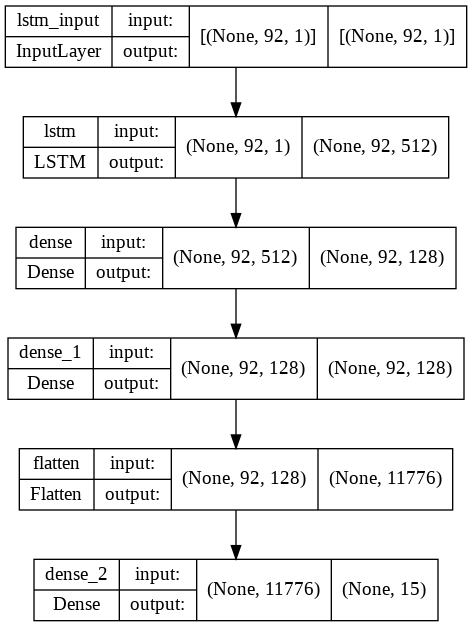

In [24]:
from keras.utils.vis_utils import plot_model

plot_model(model_lstm, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [25]:
history_lstm = model_lstm.fit(
    xtrain,
    ytrain,
    validation_split = 0.1,
    epochs = 10,
    batch_size = 500
)

Epoch 1/10
2750/2750 [==============================] - 308s 109ms/step - loss: 0.1339 - accuracy: 0.9389 - val_loss: 0.1106 - val_accuracy: 0.9464
Epoch 2/10
2750/2750 [==============================] - 302s 110ms/step - loss: 0.1085 - accuracy: 0.9466 - val_loss: 0.1033 - val_accuracy: 0.9476
Epoch 3/10
2750/2750 [==============================] - 301s 109ms/step - loss: 0.1031 - accuracy: 0.9483 - val_loss: 0.1018 - val_accuracy: 0.9484
Epoch 4/10
2750/2750 [==============================] - 300s 109ms/step - loss: 0.1012 - accuracy: 0.9489 - val_loss: 0.1015 - val_accuracy: 0.9488
Epoch 5/10
2750/2750 [==============================] - 300s 109ms/step - loss: 0.1026 - accuracy: 0.9483 - val_loss: 0.1022 - val_accuracy: 0.9484
Epoch 6/10
2750/2750 [==============================] - 300s 109ms/step - loss: 0.1015 - accuracy: 0.9486 - val_loss: 0.0999 - val_accuracy: 0.9488
Epoch 7/10
2750/2750 [==============================] - 300s 109ms/step - loss: 0.0999 - accuracy: 0.9492 - val_

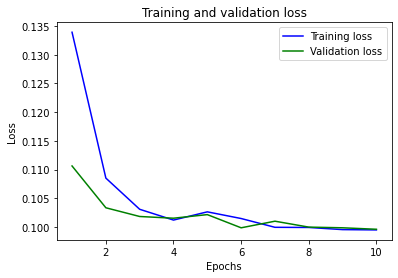

In [27]:
import matplotlib.pyplot as plt

plt.clf()
loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

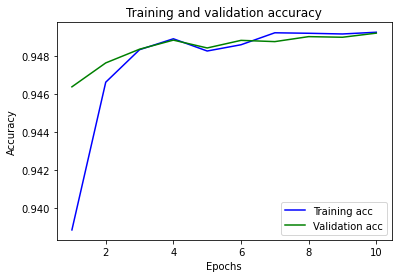

In [28]:
plt.clf()
acc = history_lstm.history['accuracy']
val_acc = history_lstm.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [30]:
# Evaluation du model
# Evaluation du model
model_lstm.evaluate(xtest,ytest)

11936/11936 [==============================] - 85s 7ms/step - loss: 0.0994 - accuracy: 0.9493


[0.0994281992316246, 0.9492688775062561]

In [31]:
from sklearn import metrics
y_pred = model_lstm.predict(xtest)
y_pred = np.argmax(y_pred,axis=1) 
y_true = np.argmax(ytest,axis=1)

In [32]:
y_pred

array([7, 7, 7, ..., 7, 7, 7])

In [33]:
y_true

array([7, 7, 7, ..., 7, 7, 7])

In [53]:
from sklearn.metrics import multilabel_confusion_matrix
cm_ml =multilabel_confusion_matrix(y_true, y_pred)


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      4853
           1       0.74      0.95      0.83      9544
           2       0.99      1.00      1.00     13481
           3       0.82      1.00      0.90     10009
           4       1.00      1.00      1.00     24486
           5       0.88      0.08      0.15       169
           6       1.00      1.00      1.00        75
           7       1.00      1.00      1.00    272701
           8       0.46      0.78      0.58      9994
           9       1.00      0.49      0.66      3969
          10       0.99      0.89      0.94      1989
          11       0.61      0.32      0.42     10209
          12       0.67      0.48      0.56      7319
          13       1.00      0.85      0.92     10134
          14       0.61      0.34      0.43      3003

    accuracy                           0.95    381935
   macro avg       0.85      0.74      0.76    381935
weighted avg       0.95   

In [67]:
class_names = ['Normal', 'DDoS_UDP  ', 'DDoS_ICMP', 'SQL_injection','Password','Vulnerability_scanner','DDoS_TCP','DDoS_HTTP',
               'Uploading','Backdoor','Port_Scanning','XSS','Ransomware','MITM','Fingerprinting']

In [77]:
cm = metrics.confusion_matrix(y_true, y_pred)

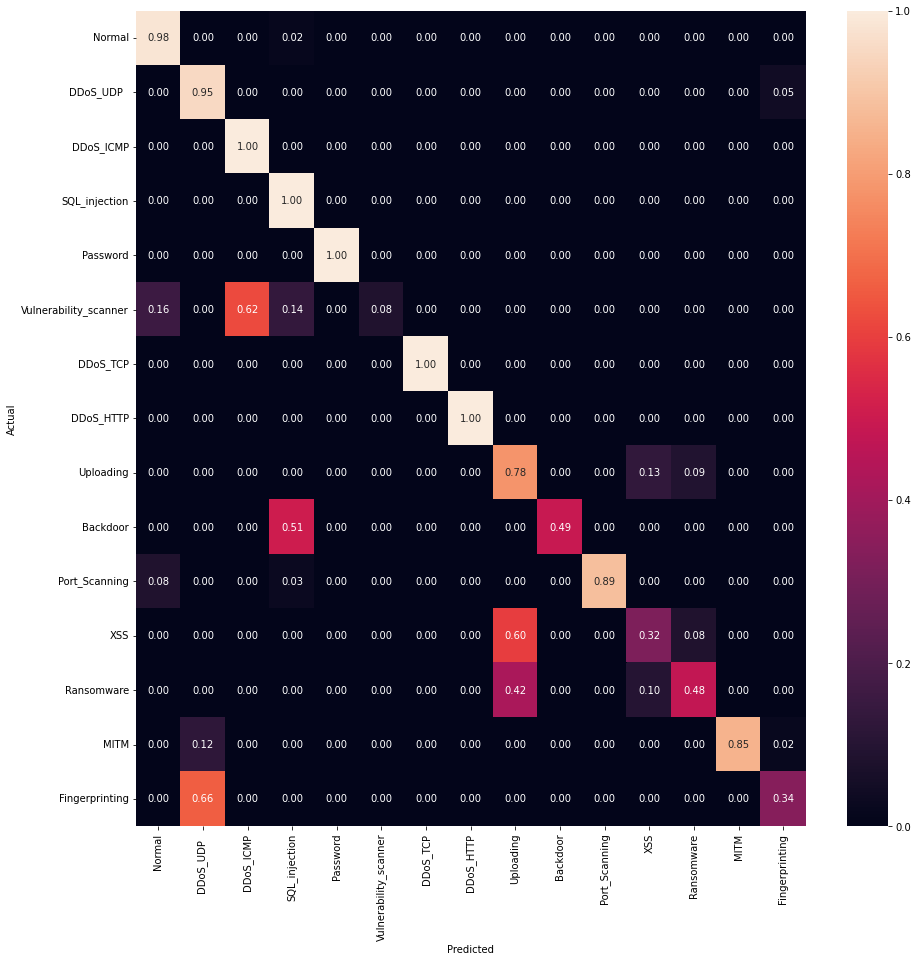

In [93]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#cm = confusion_matrix(y_test, y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)


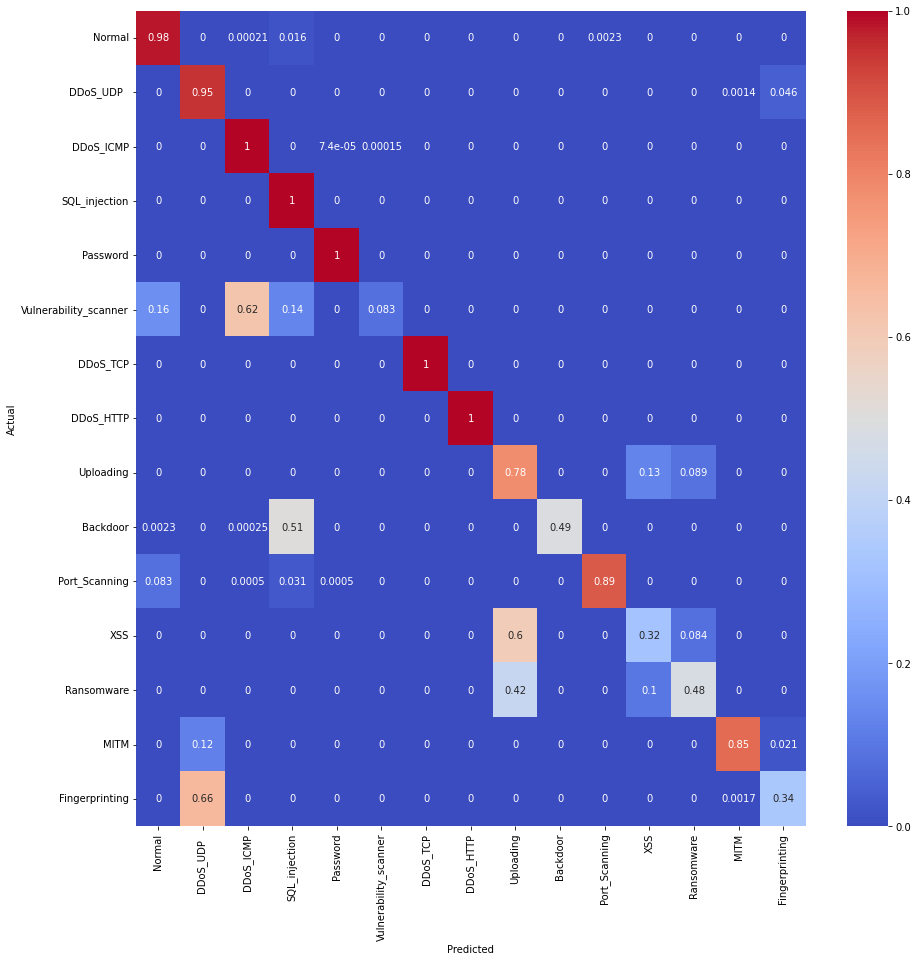

In [95]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#cm = confusion_matrix(y_test, y_pred)
# Normalise
cmml = cm_ml.astype('float') / cm_ml.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cmn, annot=True, fmt='.2g', cmap="coolwarm",xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)